<a href="https://colab.research.google.com/github/ricardotran92/COVID19_Pneumonia_Normal_Chest_Xray_PA/blob/main/Github_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive as drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Access a public Github repos
!rm -rf /content/COVID19_Pneumonia_Normal_Chest_Xray_PA # remove git clone
%cd '/content'
!git clone https://github.com/ricardotran92/COVID19_Pneumonia_Normal_Chest_Xray_PA.git

/content
Cloning into 'COVID19_Pneumonia_Normal_Chest_Xray_PA'...
remote: Enumerating objects: 6884, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 6884 (delta 28), reused 40 (delta 10), pack-reused 6811
Receiving objects: 100% (6884/6884), 1.86 GiB | 31.93 MiB/s, done.
Resolving deltas: 100% (42/42), done.
Updating files: 100% (7001/7001), done.


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [4]:
# @title
def DataSetSummary (local_path, tabs):
  # Take list of files & folders in local folder
  all_items = os.listdir(local_path)

  # Filter folder list
  folders = [item for item in all_items if os.path.isdir(os.path.join(local_path, item))]

  # Print summary information if folders > 0:
  if(len(folders) > 0):
    indent = '\t' * tabs
    print("{}Tổng số thư mục: {}".format(indent, len(folders)))
    for folder in folders:
      folder_path = os.path.join(local_path, folder)
      files_in_folder = len(os.listdir(folder_path))
      print("{}-Thư mục: {}, Số tệp: {}".format(indent, folder, files_in_folder))
      DataSetSummary(folder_path, tabs+1)

# DataSetSummary(local_path, 0)

In [5]:
# import os

# Hierarchical local folder in Colab
repository_folder = ["COVID19_Pneumonia_Normal_Chest_Xray_PA"]

for folder in repository_folder:
  local_path = '/content/' + folder + '/dataset'
  # local_path = '/content/' + folder + '/sample'
  DataSetSummary(local_path, 0)

Tổng số thư mục: 3
-Thư mục: normal, Số tệp: 2313
-Thư mục: covid, Số tệp: 2313
-Thư mục: pneumonia, Số tệp: 2313


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing

/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing


In [7]:
# Set the path to your dataset
# dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/sample'
dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/dataset'

In [8]:
import os

class Image:
    def __init__(self, path, label):
        # self.image = cv2.imread(path) # directly read
        self.path = path # only directory
        self.label = label

def load_images_from_folder(dataset_path):
    images = []
    # labels = [] # direct
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                img = Image(image_path, class_name)
                images.append(img)
                # labels.append(img.label) # direct
    # return images, labels # direct
    return images

images = load_images_from_folder(dataset_path)
# for class_name, imgs in images.items():
#     for img in imgs:
#         print(f"Path: {img.path}, Label: {img.label}")

Class normal


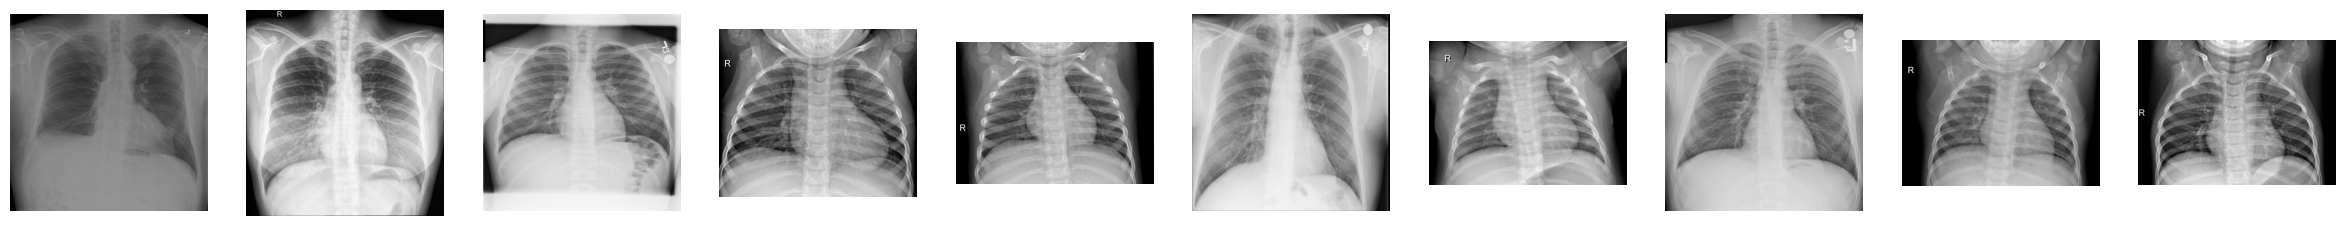

Class covid


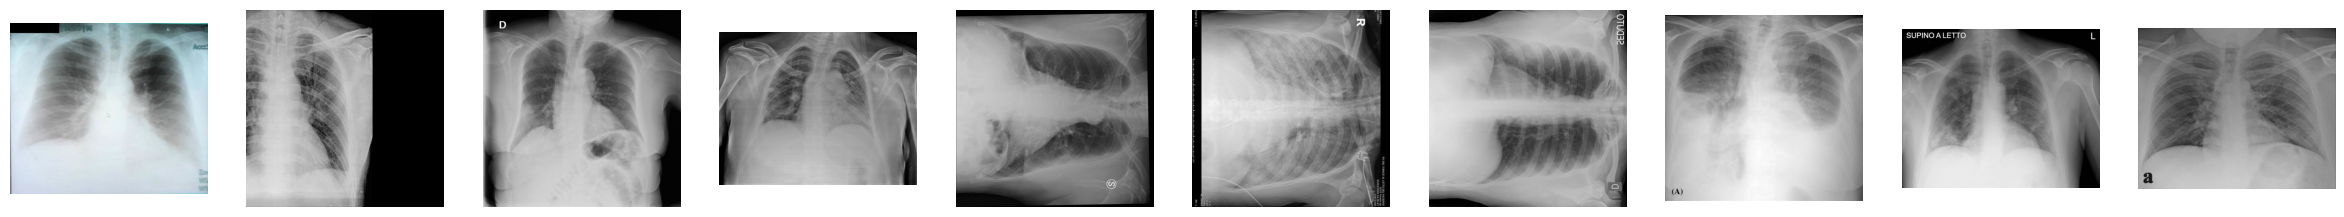

Class pneumonia


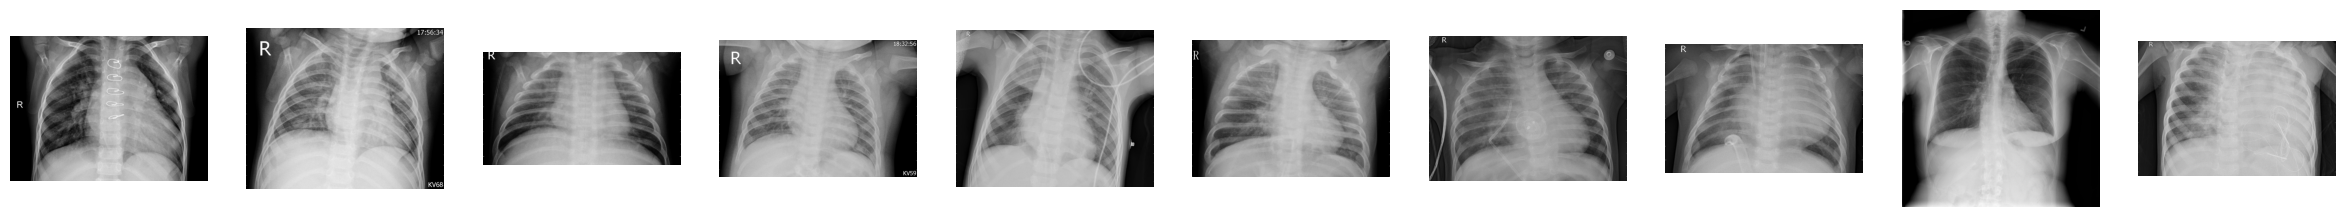

In [9]:
def load_images_from_folder(dataset_path, images_per_class=None):
    images = {}
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            count = 0
            images[class_name] = []
            for image_name in os.listdir(class_folder_path):
                if images_per_class is None or count < images_per_class:
                    image_path = os.path.join(class_folder_path, image_name)
                    img = Image(image_path, class_name)
                    images[class_name].append(img)
                    count += 1
    return images

def imshow(images, images_per_class=None):
    for class_name, imgs in images.items():
        plt.figure(figsize=(30,30))
        print(f'Class {class_name}')
        for i in range(min(images_per_class if images_per_class else len(imgs), len(imgs))):
            plt.subplot(1, images_per_class if images_per_class else len(imgs), i+1)
            img = cv2.imread(imgs[i].path)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            # plt.title(os.path.basename(imgs[i].path))
            plt.axis('off')
        plt.show()

# Example usage:
images = load_images_from_folder(dataset_path)
imshow(images, 10)


In [10]:
from PIL import Image

def get_image_specifications(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Get image specifications
        image_format = img.format
        image_mode = img.mode
        image_size = img.size
        image_width, image_height = img.size
        image_color = img.getcolors()

    return f"Image Format: {image_format}\nImage Mode: {image_mode}\nImage Size: {image_size} pixels (Width: {image_width}, Height: {image_height})\nImage Colors: {image_color}"

# Example usage:
# image_path = "/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/sample/pneumonia/00001182_004.png"
print('images.keys:', images.keys())
print('image_path:',image_path := images['normal'][0].path)
image_specifications = get_image_specifications(image_path)
print(image_specifications)

images.keys: dict_keys(['normal', 'covid', 'pneumonia'])
image_path: /content/COVID19_Pneumonia_Normal_Chest_Xray_PA/dataset/normal/00000913_000.png
Image Format: PNG
Image Mode: L
Image Size: (1024, 1024) pixels (Width: 1024, Height: 1024)
Image Colors: [(12288, 0), (227, 1), (144, 2), (128, 3), (107, 4), (122, 5), (107, 6), (114, 7), (96, 8), (114, 9), (105, 10), (106, 11), (123, 12), (103, 13), (106, 14), (115, 15), (124, 16), (124, 17), (143, 18), (133, 19), (163, 20), (166, 21), (156, 22), (162, 23), (168, 24), (200, 25), (221, 26), (220, 27), (221, 28), (254, 29), (271, 30), (254, 31), (291, 32), (286, 33), (317, 34), (343, 35), (312, 36), (281, 37), (338, 38), (363, 39), (360, 40), (412, 41), (500, 42), (484, 43), (524, 44), (545, 45), (617, 46), (728, 47), (841, 48), (1015, 49), (1172, 50), (1321, 51), (1670, 52), (2045, 53), (2337, 54), (2697, 55), (3124, 56), (3472, 57), (3890, 58), (4188, 59), (4608, 60), (4985, 61), (5292, 62), (5607, 63), (6162, 64), (6420, 65), (7078, 66)

In [11]:
import os
import cv2
import numpy as np
from shutil import copyfile

# Define that paths
# dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/sample'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/MassivePNG_CLAHE_medianF3x3'

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Get the list of child class folders
child_folders = os.listdir(dataset_path)

# Process each child class folder
for folder in child_folders:
    # Create the output folder for the current child class
    output_folder = os.path.join(output_path, folder)
    os.makedirs(output_folder, exist_ok=True)

    # Get the list of image files in the current child class folder
    folder_path = os.path.join(dataset_path, folder)
    image_files = os.listdir(folder_path)

    # # List of lossless formats
    # lossless_formats = ['.png']

    # Process each image file
    for image_file in image_files:
        # Read the image
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path)

        # # Preprocess the image
        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # CLAHE (Contrast Limited Adaptive Histogram Equalization)
        # create a CLAHE object (Arguments are optional).
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        cl1 = clahe.apply(gray)

        # Apply median filter
        median = cv2.medianBlur(cl1, 3)

        # # Reverse the image (if GRAY2BGR)
        # reversed_img = 255 - cl1
        # # Convert the reversed image back to color
        # color_img = cv2.cvtColor(reversed_img, cv2.COLOR_GRAY2BGR)

        # Export the preprocessed image to the output folder
        filename, extension = os.path.splitext(image_file)
        # output_image_path = os.path.join(output_folder, image_file)
        output_image_path = os.path.join(output_folder, filename + '.png') # ('jpg', 'png')

        # cv2.imwrite(output_image_path, img)
        # cv2.imwrite(output_image_path, cl1)
        # cv2.imwrite(output_image_path, color_img)
        cv2.imwrite(output_image_path, median)
        # cv2.imwrite(output_image_path, final_img)


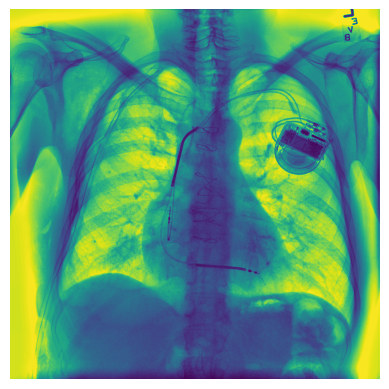

In [ ]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(reversed_img)
plt.axis('off')
plt.show()